<a href="https://colab.research.google.com/github/mjee12/sentimentAnalysis/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment Analysis Project using Natural Language Processor and Machine Learning models, such as Naive Bayes Classifier and Logistic Regression
Purpose: Predict whether the customers are satisfied with the product, Amazon Alexa, based on reviews 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Amazon Alexa Reviews dataset from Kaggle
reviews = pd.read_csv('/content/drive/My Drive/Sentiment Analysis Project/amazon_alexa.tsv', sep = '\t')

In [ ]:
reviews

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [ ]:
reviews['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

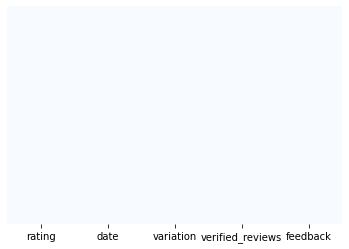

In [ ]:
#check for null values (no shades of blue means no null values)
sns.heatmap(reviews.isnull(), yticklabels= False, cbar= False, cmap = 'Blues')

In [ ]:
#add a new column with the lengths of every review
reviews['length'] = reviews['verified_reviews'].apply(len)

In [ ]:
reviews.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


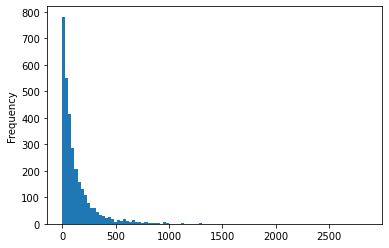

In [ ]:
reviews['length'].plot(bins = 100, kind = 'hist')

In [ ]:
reviews['length'].max()

2851

In [ ]:
#define separate positive and negative feedback dataframes
positive = reviews[reviews['feedback']==1]
negative = reviews[reviews['feedback']==0]

In [ ]:
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [ ]:
sentences = reviews['verified_reviews'].tolist()

In [ ]:
total_sentences = " ".join(sentences)

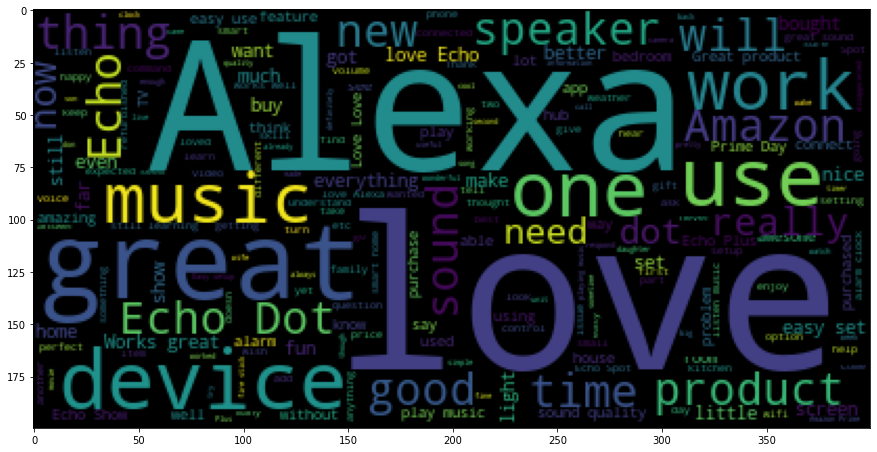

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(total_sentences))
#biggest words are "love","good","great" -> more positive feedback

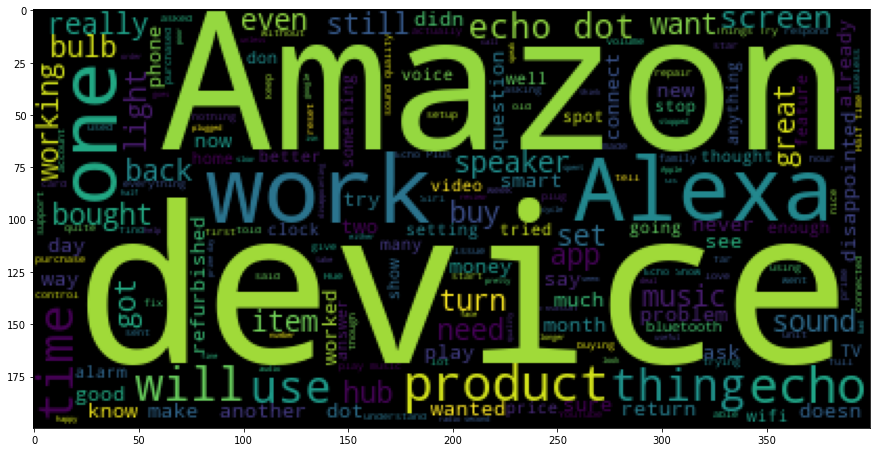

In [ ]:
neg_sentences = negative['verified_reviews'].tolist()
total_neg_sentences = " ".join(neg_sentences)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(total_neg_sentences))

In [ ]:
#data cleaning: drop unnecessary columns
reviews = reviews.drop(['rating','date','length'], axis = 1)

In [ ]:
reviews

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
#encode variation variable using get_dummies
variation_dum = pd.get_dummies(reviews['variation'], drop_first= True)

In [ ]:
reviews

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [ ]:
variation_dum

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
#drop 'variation' column because it is encoded now
reviews.drop(['variation'], axis = 1, inplace= True)

In [ ]:
reviews = pd.concat([reviews, variation_dum], axis = 1)

In [ ]:
reviews

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
#data cleaning
#create a function that removes punctuation and stopwords from reviews
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean(msg):
  puncRemoved = [elem for elem in msg if elem not in string.punctuation]
  puncRemoved = ''.join(puncRemoved)
  swRemoved = [word for word in puncRemoved.split() if word.lower() not in stopwords.words('english')]
  return swRemoved

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
reviews_clean = reviews['verified_reviews'].apply(clean)

In [ ]:
#perform count vectorization using the clean function
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = clean)
reviews_vectorized = vectorizer.fit_transform(reviews['verified_reviews'])

In [ ]:
#all unique words found in reviews
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

In [ ]:
#tokenized array of reviews
print(reviews_vectorized.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#turn tokenized reviews into a dataframe and replace 'verified_reviews'
reviews.drop(['verified_reviews'], axis = 1, inplace= True)
reviews_df = pd.DataFrame(reviews_vectorized.toarray())
reviews = pd.concat([reviews, reviews_df], axis = 1)

In [ ]:
#drop 'feedback' column because it contains the output value
#Define x and y as input/output for the Naive Bayes Classifier
X = reviews.drop(['feedback'], axis = 1)
Y = reviews['feedback']

In [ ]:
#train Naive Bayes Classifier
from sklearn.model_selection import train_test_split
#allocate 20 percent to test dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .2)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#assess the trained model
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#see what model predicts using train dataset
y_train_pred = NB.predict(x_train)

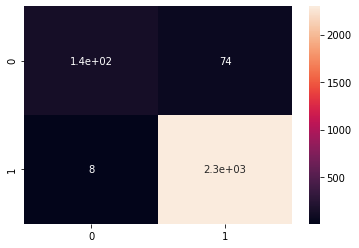

In [ ]:
conMatrix = confusion_matrix(y_train, y_train_pred)
#visualize confusion matrix to see how many values were predicted correctly or showed Type I, II error
#Type I error: Top Right box
#Type II error: Bottom Left box
sns.heatmap(conMatrix, annot = True)

Model performed well because most of the data was predicted correctly with only 74 showing Type I error and 8 showing Type II error

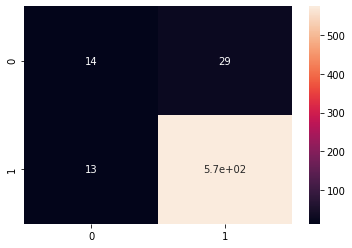

In [ ]:
#repeat steps for test dataset
y_test_pred = NB.predict(x_test)
conMatrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conMatrix, annot = True)

In [ ]:
#find recall and precision values
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.52      0.33      0.40        43
           1       0.95      0.98      0.96       587

    accuracy                           0.93       630
   macro avg       0.74      0.65      0.68       630
weighted avg       0.92      0.93      0.93       630



Recall value of .33 for class 0 is not very good.
Precision of .95 and recall of .98 for class 1 is good.

In [ ]:
#train and evaluate using Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
#find accuracy comparing predicted y values to y_test, which contains the actual true labels
print('Accuracy: {} %'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy: 94.6031746031746 %


pretty good accuracy.

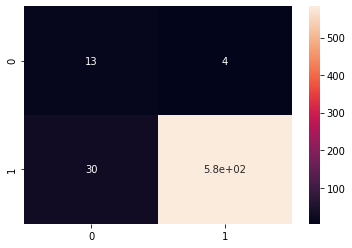

In [ ]:
conMatrix = confusion_matrix(y_pred, y_test)
sns.heatmap(conMatrix, annot = True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.30      0.43        43
           1       0.95      0.99      0.97       587

    accuracy                           0.95       630
   macro avg       0.86      0.65      0.70       630
weighted avg       0.94      0.95      0.93       630



Much better precision value for class 0